In [1]:
# Import required libraries
import pickle
import pandas as pd
from pytrends.request import TrendReq
from matplotlib import rcParams
%matplotlib inline
rcParams.update({'figure.autolayout': True})

In [2]:
# Defining the trends request
#   https://trends.google.com/trends/explore?q=blockchain&geo=US
kw_list = ["nintendo"]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [3]:
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()

In [4]:
interest_over_time_df

,nintendo,isPartial
date,,
2014-06-15,21,False
2014-06-22,20,False
2014-06-29,20,False
2014-07-06,21,False
2014-07-13,21,False
2014-07-20,22,False
2014-07-27,21,False
2014-08-03,20,False
2014-08-10,20,False


            nintendo isPartial
date                          
2014-06-15        21     False
2014-06-22        20     False
2014-06-29        20     False
2014-07-06        21     False
2014-07-13        21     False


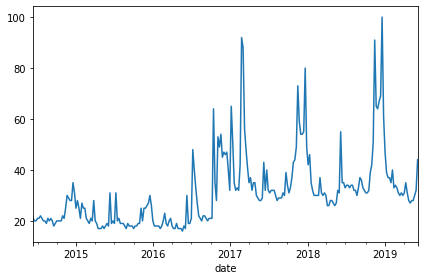

In [5]:
# "Dumping" the dataframe to pkl
dataDumpPath = "../data/extracted/Trends/dataDump.pkl"
interest_over_time_df.to_pickle(dataDumpPath)
interest_over_time_df = pd.read_pickle(dataDumpPath)
# interest_over_time_df.loc['2017-10-26']
print(interest_over_time_df.head())
interest_over_time_df["nintendo"].plot()

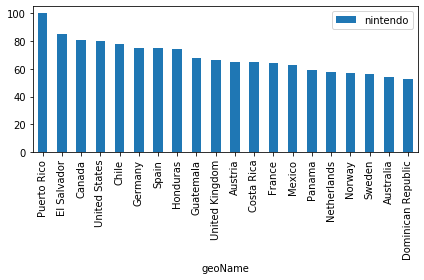

In [6]:
# Interest by Region
interest_by_region_df = pytrends.interest_by_region()
interest_by_region_df.sort_values(
    by=["nintendo"], ascending=False, inplace=True
)
interest_by_region_df.iloc[:20].plot.bar()
# fig = interest_by_region_df.iloc[:20].plot.bar()
# fig.get_figure().savefig('trends.png',dpi=500)

In [7]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrends.related_queries()
print(related_queries_dict)

{'nintendo': {'top':                     query  value
0                  switch    100
1         switch nintendo     99
2            nintendo 3ds     31
3                     3ds     30
4          nintendo games     23
5                      ds     21
6             nintendo ds     20
7          super nintendo     20
8                     wii     14
9            nintendo wii     14
10                   game     13
11                  mario     12
12            nintendo 64     11
13  nintendo switch games     10
14           switch games     10
15                pokemon     10
16           new nintendo      9
17       nintendo classic      8
18           nes nintendo      7
19        nintendo 3ds xl      7
20                 3ds xl      7
21                    nes      6
22           nintendo 2ds      6
23          mini nintendo      6
24                    2ds      6, 'rising':                              query   value
0            nintendo switch games  132050
1                     sw

In [8]:
# Get Google Keyword Suggestions
suggestions_dict = pytrends.suggestions(keyword='pizza')
print(suggestions_dict)

[{'mid': '/m/0663v', 'title': 'Pizza', 'type': 'Dish'}, {'mid': '/m/03clwm', 'title': "Domino's Pizza", 'type': 'Restaurant company'}, {'mid': '/m/09cfq', 'title': 'Pizza Hut', 'type': 'Restaurant company'}, {'mid': '/m/020tvm', 'title': "Papa John's Pizza", 'type': 'Restaurant company'}, {'mid': '/m/02618z5', 'title': 'Pizza 73', 'type': 'Restaurant company'}]


In [9]:
# Get Google Hot Trends data
trending_searches_df = pytrends.trending_searches()
print(trending_searches_df.head())

                       0
0  Australia vs Pakistan
1           Maren Morris
2            Nintendo E3
3            Jon Stewart
4          Banjo-Kazooie
